# Follow these instructions:

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# Assignment 6: Model Selection and Cross-validation [ __ /100 marks]


In this assignment we will examine ["Forest Fires"](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) dataset to predict the burned area of forest fires giving some features. We will apply model selection and cross-validation method we learned.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin
np.set_printoptions(precision=3)
seed=0

## Question 1.0 [ _ /6 marks]

Read the file `forestfires.csv` into a dataframe. Display the first 5 rows of this dataframe. 

In [ ]:
# Read forestfires.csv into a dataframe [ /1 marks] 
# ****** your code here ****** 
df = pd.read_csv("forestfires.csv")

# Display the first 5 rows of the dataframe [ /1 marks]
# ****** your code here ****** 
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
# Inspect the data types of the attributes in the dataframe and answer the question in the next cell
# ****** your code here ****** 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


 **Questions**:
 1. How many rows are there?  [ /1 marks]
 2. Does the data consist of any null entries? [ /1 marks]
 3. What categorical attributes do you see? [ /2 marks]
 
**Your answer**:
1. 517
2. No
3. `day` and `month` 

## Question 1.1 [ _ /15 marks]

Using the threshold of statistical significance for linear regression, check statistical significance of the labels of each categorical attribute. Group insignificant labels into two new statistically significant labels.

In [ ]:
# check statistical significance of the labels in categorical attribute 1. [ /3 marks]
# ****** your code here ******

((df.day.value_counts()/df.day.value_counts().sum())*100) < 5
# we are good with this category

sun    False
fri    False
sat    False
mon    False
tue    False
thu    False
wed    False
Name: day, dtype: bool

In [ ]:
# check statistical significance of labels in categorical attribute 2. [ /3 marks]
# ****** your code here ******

# (df.month.value_counts()/df.month.value_counts().sum())*100 < 5
((df.month.value_counts()/df.month.value_counts().sum())*100).round(2)
# we see that feb, jun, oct, apr, dec, jan, may, nov are statistically insignificant

aug    35.59
sep    33.27
mar    10.44
jul     6.19
feb     3.87
jun     3.29
oct     2.90
apr     1.74
dec     1.74
jan     0.39
may     0.39
nov     0.19
Name: month, dtype: float64

In [ ]:
# Group insignificant labels into two new statistically significant labels. [ /8 marks]
# ****** your code here ******

# we can put 'feb' and 'jun' together to create a new statistically significant categorical attribute called "fj"
df.month.replace({'feb':'fj', 'jun':'fj'}, inplace=True)

# we can put 'oct', 'apr', 'dec', 'jan', 'may', and 'nov' together to create another new statistically significant categorical attribute called "oadjmn"
df.month.replace({'oct':'oadjmn', 'apr':'oadjmn', 'dec':'oadjmn', 'jan':'oadjmn', 'may':'oadjmn', 'nov':'oadjmn'}, inplace=True)

In [ ]:
# recheck statistical significance of the attribute with adjusted labels [ /1 marks]
# ****** your code here ******

((df.month.value_counts()/df.month.value_counts().sum())*100).round(2)
# all are now greater than 5%

aug       35.59
sep       33.27
mar       10.44
oadjmn     7.35
fj         7.16
jul        6.19
Name: month, dtype: float64

## Question 1.2 [ _ /4 marks]

Let's convert all categorical data into numerical data using `get_dummies`. Display the first 5 rows of your new dataframe.

In [ ]:
# Use "get_dummies" to perform one hot encoding to the categorical attributes [ /3 marks]
# ****** your code here ****** 
df = pd.get_dummies(df, drop_first=True)

# Display first 5 rows of the dataframe [ /1 mark]
# ****** your code here ****** 
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_jul,month_mar,month_oadjmn,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,1,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,1,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
# The .head() in the previous cell might give a truncated view. You can see all columns names using: 
df.columns

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area', 'month_fj', 'month_jul', 'month_mar', 'month_oadjmn',
       'month_sep', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue',
       'day_wed'],
      dtype='object')

## Question 1.3 [ _ /8 marks]

Let's examine the distribution of the target variable "area".

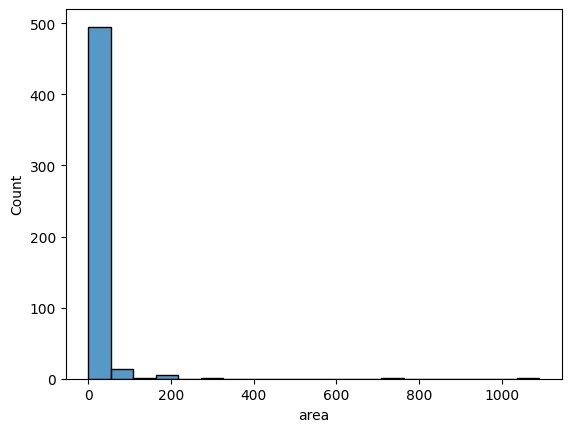

In [ ]:
# Plot the distribution of target variable "area" with bins = 20 using an appropriate seaborn function [ /1 mark]
# ****** your code here ****** 
sns.histplot(data=df.area, bins=20)
plt.show()

 **Question**:
 
 Describe the distribution of the target variable. We will use log transform on it, explain why would it help. [ /3 mark]

**Your answer**:

We are seeing a heavy tailed distributions. We use Log transform to lessen the distances between the data points to make the distribution less skewed.

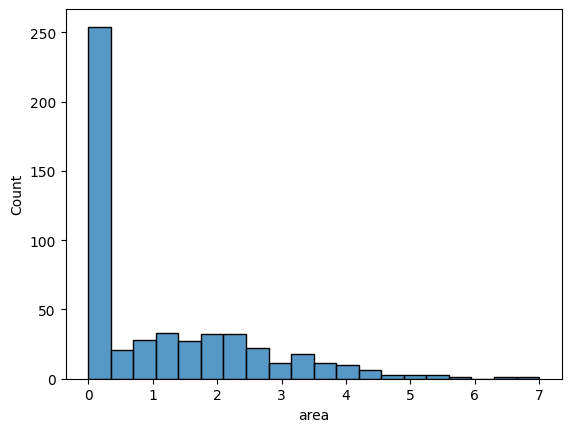

In [ ]:
# Use np.log to transform "area". [ /3 mark]
# Note that log is not defined every where and you might need to do something about it.
# ****** your code here ****** 
area_tranformed = np.log(df.area + 1) # Because it contains 0, let's add 1 to it before log transform

# Plot the distribution of target variable "area" with bins = 20 using an appropriate seaborn function [ /1 mark]
# ****** your code here ****** 
sns.histplot(data=area_tranformed, bins=20)
plt.show()

## Question 1.4 [ _ /6 marks]

Let's use **mean squared error** as our score metric. We can use `sklearn.metrics.mean_squared_error`, but here let's write our own function called `mse` with arguments `y` and `ypr`(predicted y) which returns the mean squared error. Recall the formula for MSE below:

$$ MSE = \frac{1}{n} \sum_{i=1}^{n}  \left( \hat{y_{i}}-y_{i}\right)^{2} $$

In [ ]:
# Define a function that takes in y's and returns MSE [ /6 marks]
# ****** your code here ****** 
def mse(y,ypr):
    return np.mean((y-ypr)**2)

## Question 1.5 [ _ /4 marks]

We will use all available features as predictors, and use the log transformed "area" as target variable. Then let's split our data into training and test. As usual, let's use test_size=0.2 and random_state=seed.

In [ ]:
# Create X and y [ /2 marks]
# ****** your code here ****** 
X = df.drop("area", axis=1)
y = area_tranformed

# Use train_test_split on X, y [ /2 marks]
# ****** your code here ****** 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = seed)

## Question 1.6 [ _ / 6 marks]

For our first model, create a pipeline called "M1" that performs only a linear regression. 

In [ ]:
# Create a pipeline for model 1 (M1) [ /6 marks]
# ****** your code here ****** 
M1 = Pipeline([
    ('lr1', LinearRegression())
])

## Question 1.7 [ _ / 8 marks]

For our second model let's add quadratic terms for all features (use `PolynomialFeatures`). Create a model pipeline for our second model (M2).

In [ ]:
# Create a pipeline for model 2 (M2) [ / 8 marks]
# ****** your code here ****** 
M2 = Pipeline([
    ('poly2', PolynomialFeatures(degree=2, interaction_only=False)),
    ('lr2', LinearRegression())
])

## Question 1.8 [ _ / 18 marks]

`Temperature (temp)` and `Rain (rain)` may be important features, so let's extend model 1 by adding a *cubed* term for temp and a *squared* term for rain. Before creating a pipeline for this model, we need a custom transformer: we can specify a column for squared rain and one for cubed temp. The transformer has been initialized below, but you'll need to finish it with 1-2 lines of code. After this, create your corresponding pipeline (M3).

In [ ]:
# Modify the transform method of the KeyFeatures class [ /10 marks]
class KeyFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # ****** your code here ****** 
        X = X.assign(rain=X.rain**2)
        X = X.assign(temp=X.temp**3)
        return X

# Create a pipeline for model 3 (M3) [ /8 marks]
# ****** your code here ****** 
M3 = Pipeline([
    ('kft', KeyFeatures()),
    ('lr3', LinearRegression())
])

## Question 1.9 [ _ /8 marks]

For models 1-3, use 4-fold Cross-validation (CV) on the training set to get the mean and std of score. Use your own `mse` function as your score metric.

In [ ]:
# Use 4-fold CV on all models to get mean and std of score [ /8 marks]
# ****** your code here ****** 
cvsc1 = cross_val_score(M1, Xtrain, ytrain, cv=4, scoring=make_scorer(mse))
cvsc2 = cross_val_score(M2, Xtrain, ytrain, cv=4, scoring=make_scorer(mse))
cvsc3 = cross_val_score(M3, Xtrain, ytrain, cv=4, scoring=make_scorer(mse))

print(f"M1 loss: %.4f +/- %.4f" % (cvsc1.mean(), cvsc1.std()))
print(f"M2 loss: %.4f +/- %.4f" % (cvsc2.mean(), cvsc2.std()))
print(f"M3 loss: %.4f +/- %.4f" % (cvsc3.mean(), cvsc3.std()))

M1 loss: 1.9558 +/- 0.1892
M2 loss: 89.8795 +/- 78.5693
M3 loss: 2.0884 +/- 0.2459


## Question 2.0 [ _ / 3 marks]

**Question**: 

Which model would you choose and why? [ /3 marks]

**Your answer**:

Model 1, because it has the lowest cross-validated training loss, plus, compared to M2 and M3, it is the most conservative one.

## Question 2.1 [ _ /  6 marks]

Estimate the performance of your chosen model on the test data (which has been held out) using `mse`. 

In [ ]:
# Compute the test loss on the unseen (test) dataset [ /6 marks]
# ****** your code here ******
ypred = M1.fit(Xtrain, ytrain).predict(Xtest)
test_loss = mse(ytest, ypred)

print('MSE Loss on test data:',test_loss.round(3))

MSE Loss on test data: 2.455


## Question 2.2 [ _ /8 marks]

Recap: The central limit theorem (CLT) states that if you have a population with mean $\mu$ and standard deviation $\sigma$ and take sufficiently large random samples from the population with replacement, then the distribution of the sample means will be approximately normally distributed. This will hold true regardless of whether the source population is normal or skewed, provided the sample size is sufficiently large (usually greater than 30).

Compute (and print) a 95% confidence interval for the average test error using the Central Limit Theorem. You can use the following formula to compute it: 

$$ \bar{L_n} \pm 1.96 * \frac{\sigma_{l}}{\sqrt{n}}$$

Here $\bar{L_n}$ is the average test loss (i.e. for our test set), $\sigma_l$ is the standard deviation (of our test losses), and $n$ is the total number of test losses we compute.  

In [ ]:
# Test loss here is a point estimate (statistic) for the generalization error
# Having >30 samples, we can use the formula above safely
# Here we compute confidence interval for generalization error (i.e.expected [average] test loss for this particular dataset)

# Calculate the 95% Confidence Interval for average test loss [ /8 marks]
# ****** your code here ****** 

# statistic is squared error of test set
s = (ytest-ypred)**2 

# standard error of statistic
SE = s.std() / np.sqrt(len(s)) 
L  = 1.96*SE

# Constructing confidence interval
ci = np.array([test_loss-L, test_loss+L])

print('Confidence Interval:', ci)

Confidence Interval: [1.629 3.281]


# Follow these instructions:

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.